In [26]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
training_data = dsets.MNIST(root = './data', 
                            train = True, 
                            transform= transforms.ToTensor(), 
                            download = True)
test_data = dsets.MNIST(root = './data', 
                        train = False, 
                        transform= transforms.ToTensor())

In [28]:
batch_size = 100
nb_epoch = 5

In [29]:
trainloader = torch.utils.data.DataLoader(dataset=training_data, batch_size= batch_size, shuffle= True)
testloader = torch.utils.data.DataLoader(dataset=test_data, batch_size= batch_size, shuffle= False)

### Creating the Convolutional Neural Network Model

### Output formulation for Convolution

-  $O = \frac{W-K+2P}{S}+1$
    -  $O:$ Output height/length
    -  $W:$ Input height/length
    -  $K:$ Filter/Kernel Size
    -  $P:$ Same Padding(Non Zero)
        -  $P = \frac{K-1}{2}$
    -  $S:$ Stride


### Output formulation for Pooling
-  $O = \frac{W}{K}$
    -  $O:$ Output size
    -  $W:$ Input Size
    -  $K:$ Filter size 
    
Convolutional layer 1:
$W = 28$, $K = 5$, $S = 1$. Therefore in order to have same padding we will have $P = \frac{5-1}{2} = 2$ 

Output $O = \frac{28 - 5 + 2\times2}{1} + 1 = 28$

After Pooling Layer 1:

$W = 28$, $K = 2$
$O = \frac{28}{2} = 14$

Convolutional Layer 2:

$W = 14$, $K = 5$, $S = 1 $. For same padding, $P = \frac{5-1}{2} = 2$

$O = \frac{14-5+2\times2}{1}+1  = 14$

After Pooling Layer 2:

$W = 14$, $K = 2$

$O = \frac{14}{2} = 7$


In [30]:
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        #Convolutional Layer 1
        self.conv1 = nn.Conv2d(in_channels= 1, out_channels= 16, kernel_size= 5, stride= 1, padding=2 )
        self.relu1 = nn.ReLU()
        
        #Pooling Layer 1
        self.maxpool1 = nn.MaxPool2d(2)
        
        #Convolutional Layer 2
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size= 5, stride= 1, padding= 2)
        self.relu2 = nn.ReLU()
        
        #Pooling layer 2
        self.maxpool2 = nn.MaxPool2d(2)
        
        #Full connect
        self.fc1 = nn.Linear(32*7*7, 10)
        
    def forward(self, x):
        #Convolutional Layer 1
        out = self.conv1(x)
        out = self.relu1(out)
        #Pooling layer 1
        out = self.maxpool1(out)
        #Convolutional Layer 1
        out = self.conv2(out)
        out = self.relu2(out)
        #Pooling layer 2
        out = self.maxpool2(out)
        
        #flattening the output before 
        out = out.view(out.size(0), -1)
        
        #Full connect layer
        out = self.fc1(out)
        return out
        

### Instantiate the model class

In [31]:
model = CNNModel()

### Loss function

- Cross Entropy Function

In [32]:
criterion = nn.CrossEntropyLoss()

In [33]:
print(list(model.parameters())[0].size())
print(list(model.parameters())[1].size())
print(list(model.parameters())[2].size())
print(list(model.parameters())[3].size())
print(list(model.parameters())[4].size())
print(list(model.parameters())[5].size())

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([10, 1568])
torch.Size([10])


### Training the model

In [34]:
print(model.parameters)

<bound method Module.parameters of CNNModel(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=10, bias=True)
)>


In [35]:
learning_rate = .01
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

In [37]:
num_iter = 0
loss_list = []
accuracy_list = []
iteration_list = []
for epoch in range(nb_epoch):
    for i, (images, labels) in enumerate(trainloader):
        
        images = Variable(images)
        labels = Variable(labels)
        
        #Clear all gradients
        optimizer.zero_grad()
        
        #Forward pass
        outputs = model(images)
        
        #Loss
        loss = criterion(outputs, labels)
        
        #Back Propagation
        loss.backward()
        
        #Update the parameters
        optimizer.step()
        
        num_iter+= 1
        
        if num_iter%500 == 0:
            correct = 0
            total = 0
            for (images, labels) in testloader:
                images = Variable(images)
                #Forward pass to get the logits
                outputs = model(images)
                
                #Get the predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                #Total no. of labels
                total+= labels.size(0)
                
                #Total corrected predictions
                
                correct+= (predicted == labels).sum()
                
            accuracy = correct/total
            loss_list.append(loss.data[0])
            accuracy_list.append(accuracy)
            iteration_list.append(num_iter)
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(num_iter, loss.data[0], accuracy))

Iteration: 500. Loss: 0.37619054317474365. Accuracy: 0.8894
Iteration: 1000. Loss: 0.34143680334091187. Accuracy: 0.9304
Iteration: 1500. Loss: 0.10649104416370392. Accuracy: 0.9468
Iteration: 2000. Loss: 0.14509887993335724. Accuracy: 0.954
Iteration: 2500. Loss: 0.14955678582191467. Accuracy: 0.9617
Iteration: 3000. Loss: 0.14438007771968842. Accuracy: 0.9671


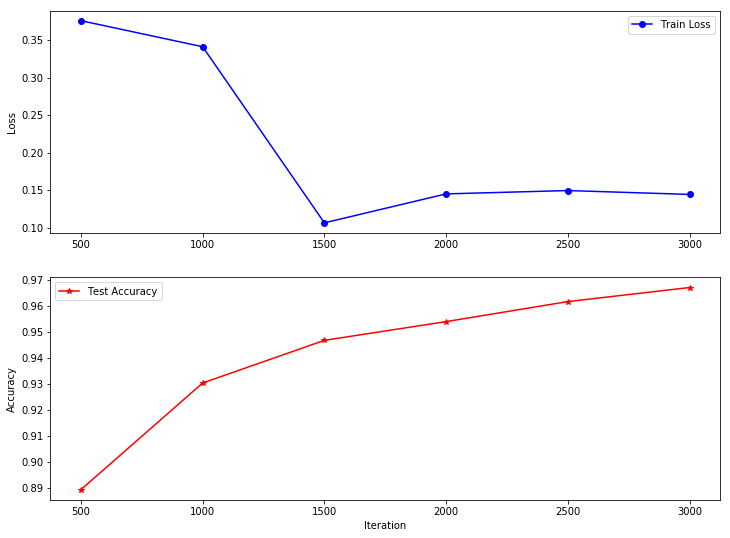

In [40]:
plt.figure(figsize= (12, 9))
plt.clf()
ax1 = plt.subplot(211)
plt.plot(iteration_list,loss_list, 'bo-', label = 'Train Loss')
plt.ylabel('Loss')
plt.setp(ax1.get_xticklabels(), fontsize=10)
plt.legend(loc = 'best')
ax2 = plt.subplot(212, sharex = ax1)
plt.plot(iteration_list, accuracy_list, 'r*-', label = 'Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.legend(loc = 'best')